In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [2]:
# Load dataset (replace with your actual data loading method)
survey_df = pd.read_csv("../../data/prep_survey_profile.csv", low_memory=False)
survey_df

,What is your age (# years)?,What is your gender?,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired),What is the size of the company where you are employed?,Approximately how many individuals are responsible for data science workloads at your place of business?,Does your current employer incorporate machine learning methods into their business?,What is your current yearly compensation (approximate $USD)?,Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?,What is the primary tool that you use at work or school to analyze data?,How long have you been writing code to analyze data (at work or at school)?,What programming language would you recommend an aspiring data scientist to learn first?,Have you ever used a TPU (tensor processing unit)?,For how many years have you used machine learning methods?
0,40-44,Male,Australia,Master’s degree,Other,Enterprise,20+,I do not know,"250,000-299,999","$10,000-$99,999",Local development environments,1-2 years,Python,Used TPU,2-3 years
1,22-24,Male,India,Bachelor’s degree,Other,Small,0,No (we do not use ML methods),"4,000-4,999",$0 (USD),Local development environments,< 1 years,Python,Never,< 1 years
2,22-24,Male,India,Master’s degree,Data Scientist,Medium,20+,We are exploring ML methods (and may one day p...,"10,000-14,999",$100-$999,Local development environments,3-5 years,Python,Used TPU,2-3 years
3,22-24,Female,United States of America,Bachelor’s degree,Data Scientist,Enterprise,20+,"We recently started using ML methods (i.e., mo...","80,000-89,999",$0 (USD),Local development environments,3-5 years,Python,Used TPU,3-4 years
4,55-59,Male,Netherlands,Master’s degree,Other,Small,1-2,We are exploring ML methods (and may one day p...,$0-999,$100-$999,Local development environments,5-10 years,Python,Never,< 1 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7794,25-29,Male,India,Master’s degree,Data Scientist,Small,1-2,"We recently started using ML methods (i.e., mo...","1,000-1,999",$100-$999,Local development environments,3-5 years,Python,Never,2-3 years
7795,22-24,Female,Other,Bachelor’s degree,Other,Medium,1-2,We are exploring ML methods (and may one day p...,"5,000-7,499",$100-$999,Local development environments,1-2 years,Python,Never,1-2 years
7796,25-29,Male,China,I prefer not to answer,Data Engineer,Mid-Large,5-9,"We recently started using ML methods (i.e., mo...","20,000-24,999",$100-$999,Local development environments,1-2 years,Python,Used TPU,1-2 years
7797,25-29,Male,Australia,Bachelor’s degree,Other,Large,5-9,No (we do not use ML methods),"60,000-69,999","$10,000-$99,999",Local development environments,3-5 years,Python,Never,1-2 years


In [3]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7799 entries, 0 to 7798
Data columns (total 15 columns):
 #   Column                                                                                                                             Non-Null Count  Dtype 
---  ------                                                                                                                             --------------  ----- 
 0   What is your age (# years)?                                                                                                        7799 non-null   object
 1   What is your gender?                                                                                                               7799 non-null   object
 2   In which country do you currently reside?                                                                                          7799 non-null   object
 3   What is the highest level of formal education that you have attained or plan to attain within

In [4]:
survey_df.describe()

,What is your age (# years)?,What is your gender?,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired),What is the size of the company where you are employed?,Approximately how many individuals are responsible for data science workloads at your place of business?,Does your current employer incorporate machine learning methods into their business?,What is your current yearly compensation (approximate $USD)?,Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?,What is the primary tool that you use at work or school to analyze data?,How long have you been writing code to analyze data (at work or at school)?,What programming language would you recommend an aspiring data scientist to learn first?,Have you ever used a TPU (tensor processing unit)?,For how many years have you used machine learning methods?
count,7799,7799,7799,7799,7799,7799,7799,7799,7799,7799,7799,7799,7799,7799,7799
unique,11,2,59,7,10,5,7,6,25,6,6,6,4,2,8
top,25-29,Male,India,Master’s degree,Data Scientist,Small,20+,"We recently started using ML methods (i.e., mo...",$0-999,$0 (USD),Local development environments,3-5 years,Python,Never,1-2 years
freq,2011,6779,1534,3750,2874,2226,1866,1873,817,2105,4713,2173,6247,6072,2207


In [5]:
# Check for missing values
missing_values = survey_df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 What is your age (# years)?                                                                                                          0
What is your gender?                                                                                                                 0
In which country do you currently reside?                                                                                            0
What is the highest level of formal education that you have attained or plan to attain within the next 2 years?                      0
Select the title most similar to your current role (or most recent title if retired)                                                 0
What is the size of the company where you are employed?                                                                              0
Approximately how many individuals are responsible for data science workloads at your place of business?                             0
Does your current employer incorporate

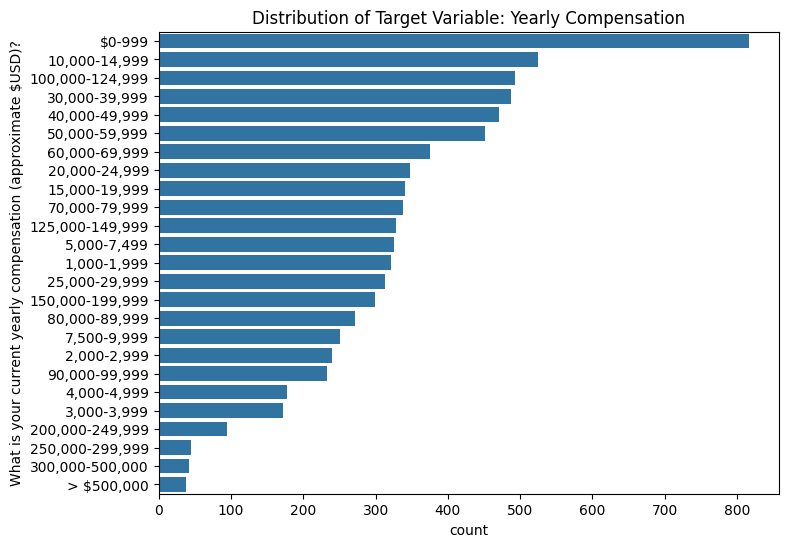

In [6]:
# Target Variable Distribution
plt.figure(figsize=(8, 6))
sns.countplot(y="What is your current yearly compensation (approximate $USD)?", data=survey_df, order=survey_df["What is your current yearly compensation (approximate $USD)?"].value_counts().index)
plt.title("Distribution of Target Variable: Yearly Compensation")
plt.show()

In [7]:
numerical_features = survey_df.select_dtypes(include=['number']).columns
if not numerical_features.empty:
    print(survey_df[numerical_features].describe())
else:
    print("No numerical features found.")

categorical_features = survey_df.select_dtypes(include=['object']).columns
if not categorical_features.empty:
    for feature in categorical_features:
        print(f"Value counts for {feature}:\n", survey_df[feature].value_counts())
else:
    print("No categorical features found.")


No numerical features found.
Value counts for What is your age (# years)?:
 What is your age (# years)?
25-29    2011
30-34    1576
22-24    1061
35-39    1051
40-44     726
45-49     453
50-54     322
18-21     270
55-59     171
60-69     136
70+        22
Name: count, dtype: int64
Value counts for What is your gender?:
 What is your gender?
Male      6779
Female    1020
Name: count, dtype: int64
Value counts for In which country do you currently reside?:
 In which country do you currently reside?
India                                                   1534
United States of America                                1298
Other                                                    392
Brazil                                                   351
Russia                                                   292
Japan                                                    257
Germany                                                  245
United Kingdom of Great Britain and Northern Ireland     231
Spain   

In [8]:
for feature in categorical_features:
    if feature != "What is your current yearly compensation (approximate $USD)?":
        contingency_table = pd.crosstab(survey_df[feature], survey_df["What is your current yearly compensation (approximate $USD)?"])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f"Chi-Square Test for {feature}: p-value = {p}")

Chi-Square Test for What is your age (# years)?: p-value = 3.9535749910789563e-292
Chi-Square Test for What is your gender?: p-value = 1.0772900392183742e-06
Chi-Square Test for In which country do you currently reside?: p-value = 0.0
Chi-Square Test for What is the highest level of formal education that you have attained or plan to attain within the next 2 years?: p-value = 2.3758878879724846e-56
Chi-Square Test for Select the title most similar to your current role (or most recent title if retired): p-value = 2.240912391885762e-37
Chi-Square Test for What is the size of the company where you are employed?: p-value = 6.356225388779395e-87
Chi-Square Test for Approximately how many individuals are responsible for data science workloads at your place of business?: p-value = 7.01525144038041e-71
Chi-Square Test for Does your current employer incorporate machine learning methods into their business?: p-value = 2.676263508765923e-111
Chi-Square Test for Approximately how much money have yo

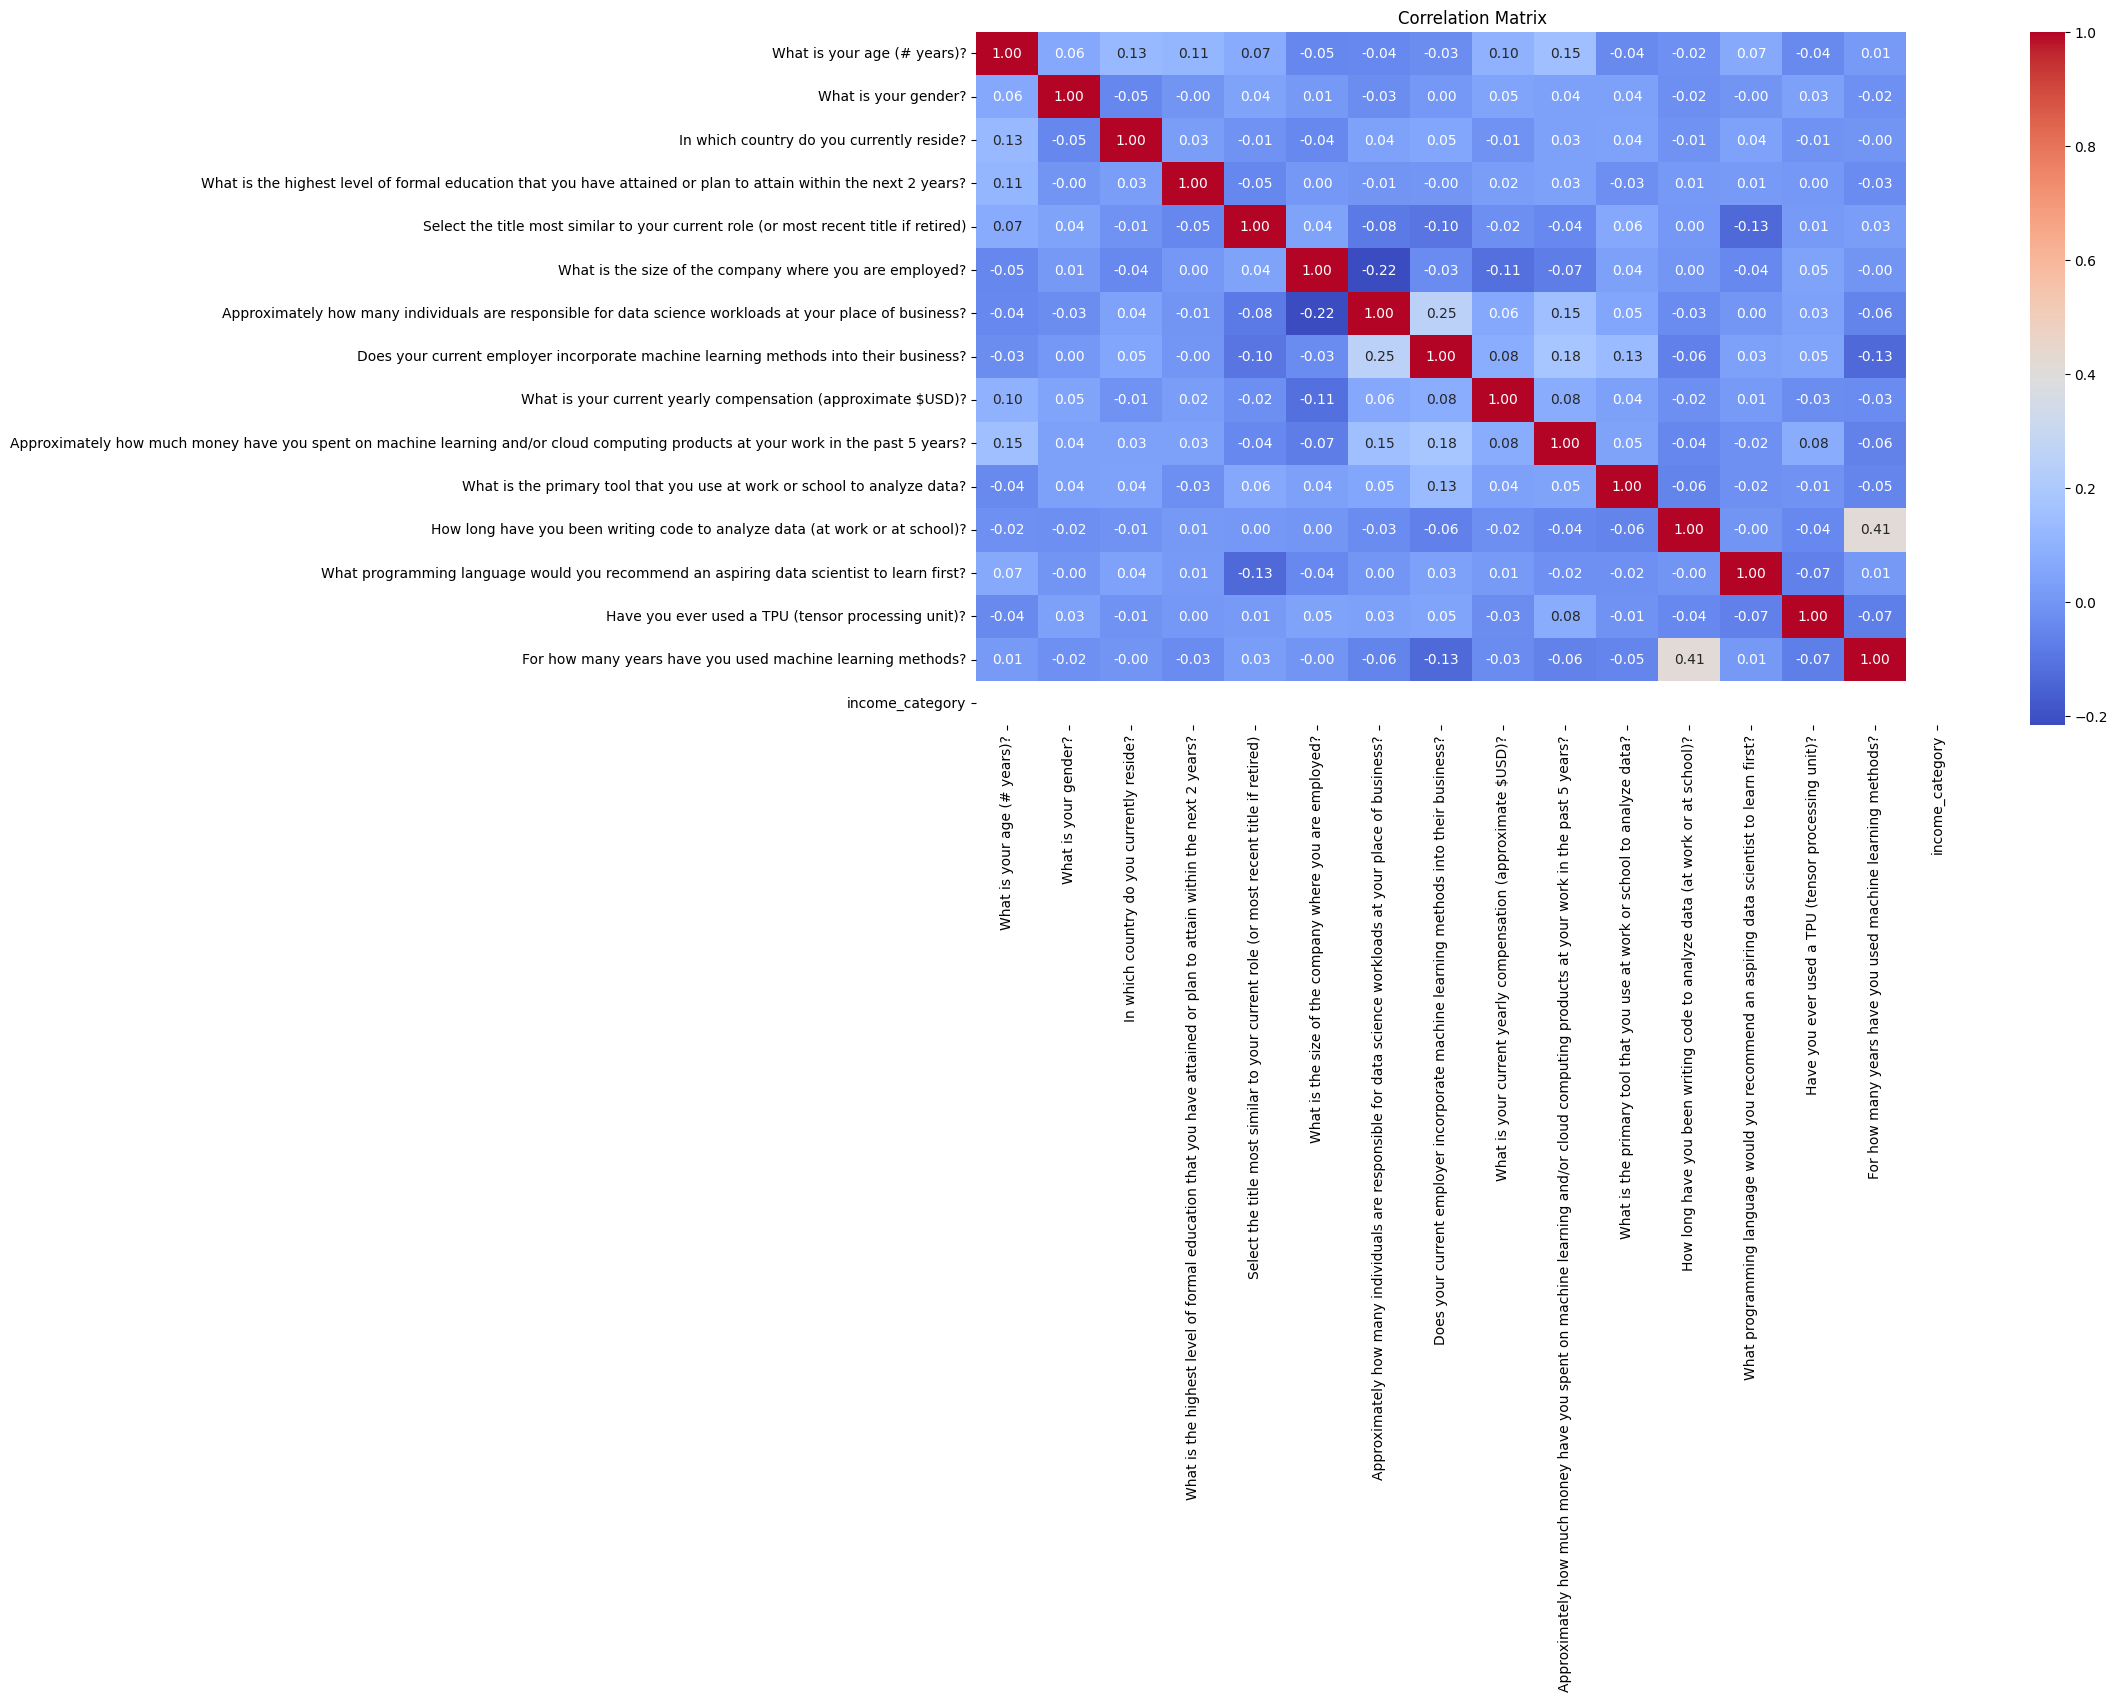

In [45]:
from sklearn.preprocessing import LabelEncoder

# Encode all categorical columns numerically
label_encoders = {}
for column in survey_df.columns:
    le = LabelEncoder()
    survey_df[column] = le.fit_transform(survey_df[column])
    label_encoders[column] = le  # Save the encoder for later use if needed

# Compute correlation matrix
plt.figure(figsize=(16, 9))
correlation_matrix = survey_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

C:\Users\Huawei\AppData\Local\Temp\ipykernel_19600\3958481275.py:10: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min(contingency_matrix.shape) - 1)))
C:\Users\Huawei\AppData\Local\Temp\ipykernel_19600\3958481275.py:10: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min(contingency_matrix.shape) - 1)))
C:\Users\Huawei\AppData\Local\Temp\ipykernel_19600\3958481275.py:10: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min(contingency_matrix.shape) - 1)))
C:\Users\Huawei\AppData\Local\Temp\ipykernel_19600\3958481275.py:10: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min(contingency_matrix.shape) - 1)))
C:\Users\Huawei\AppData\Local\Temp\ipykernel_19600\3958481275.py:10: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min(contingency_matrix.shape) - 1)))
C:\Users\Huawei\AppData\Local\Temp\ipykernel_19600\395848127

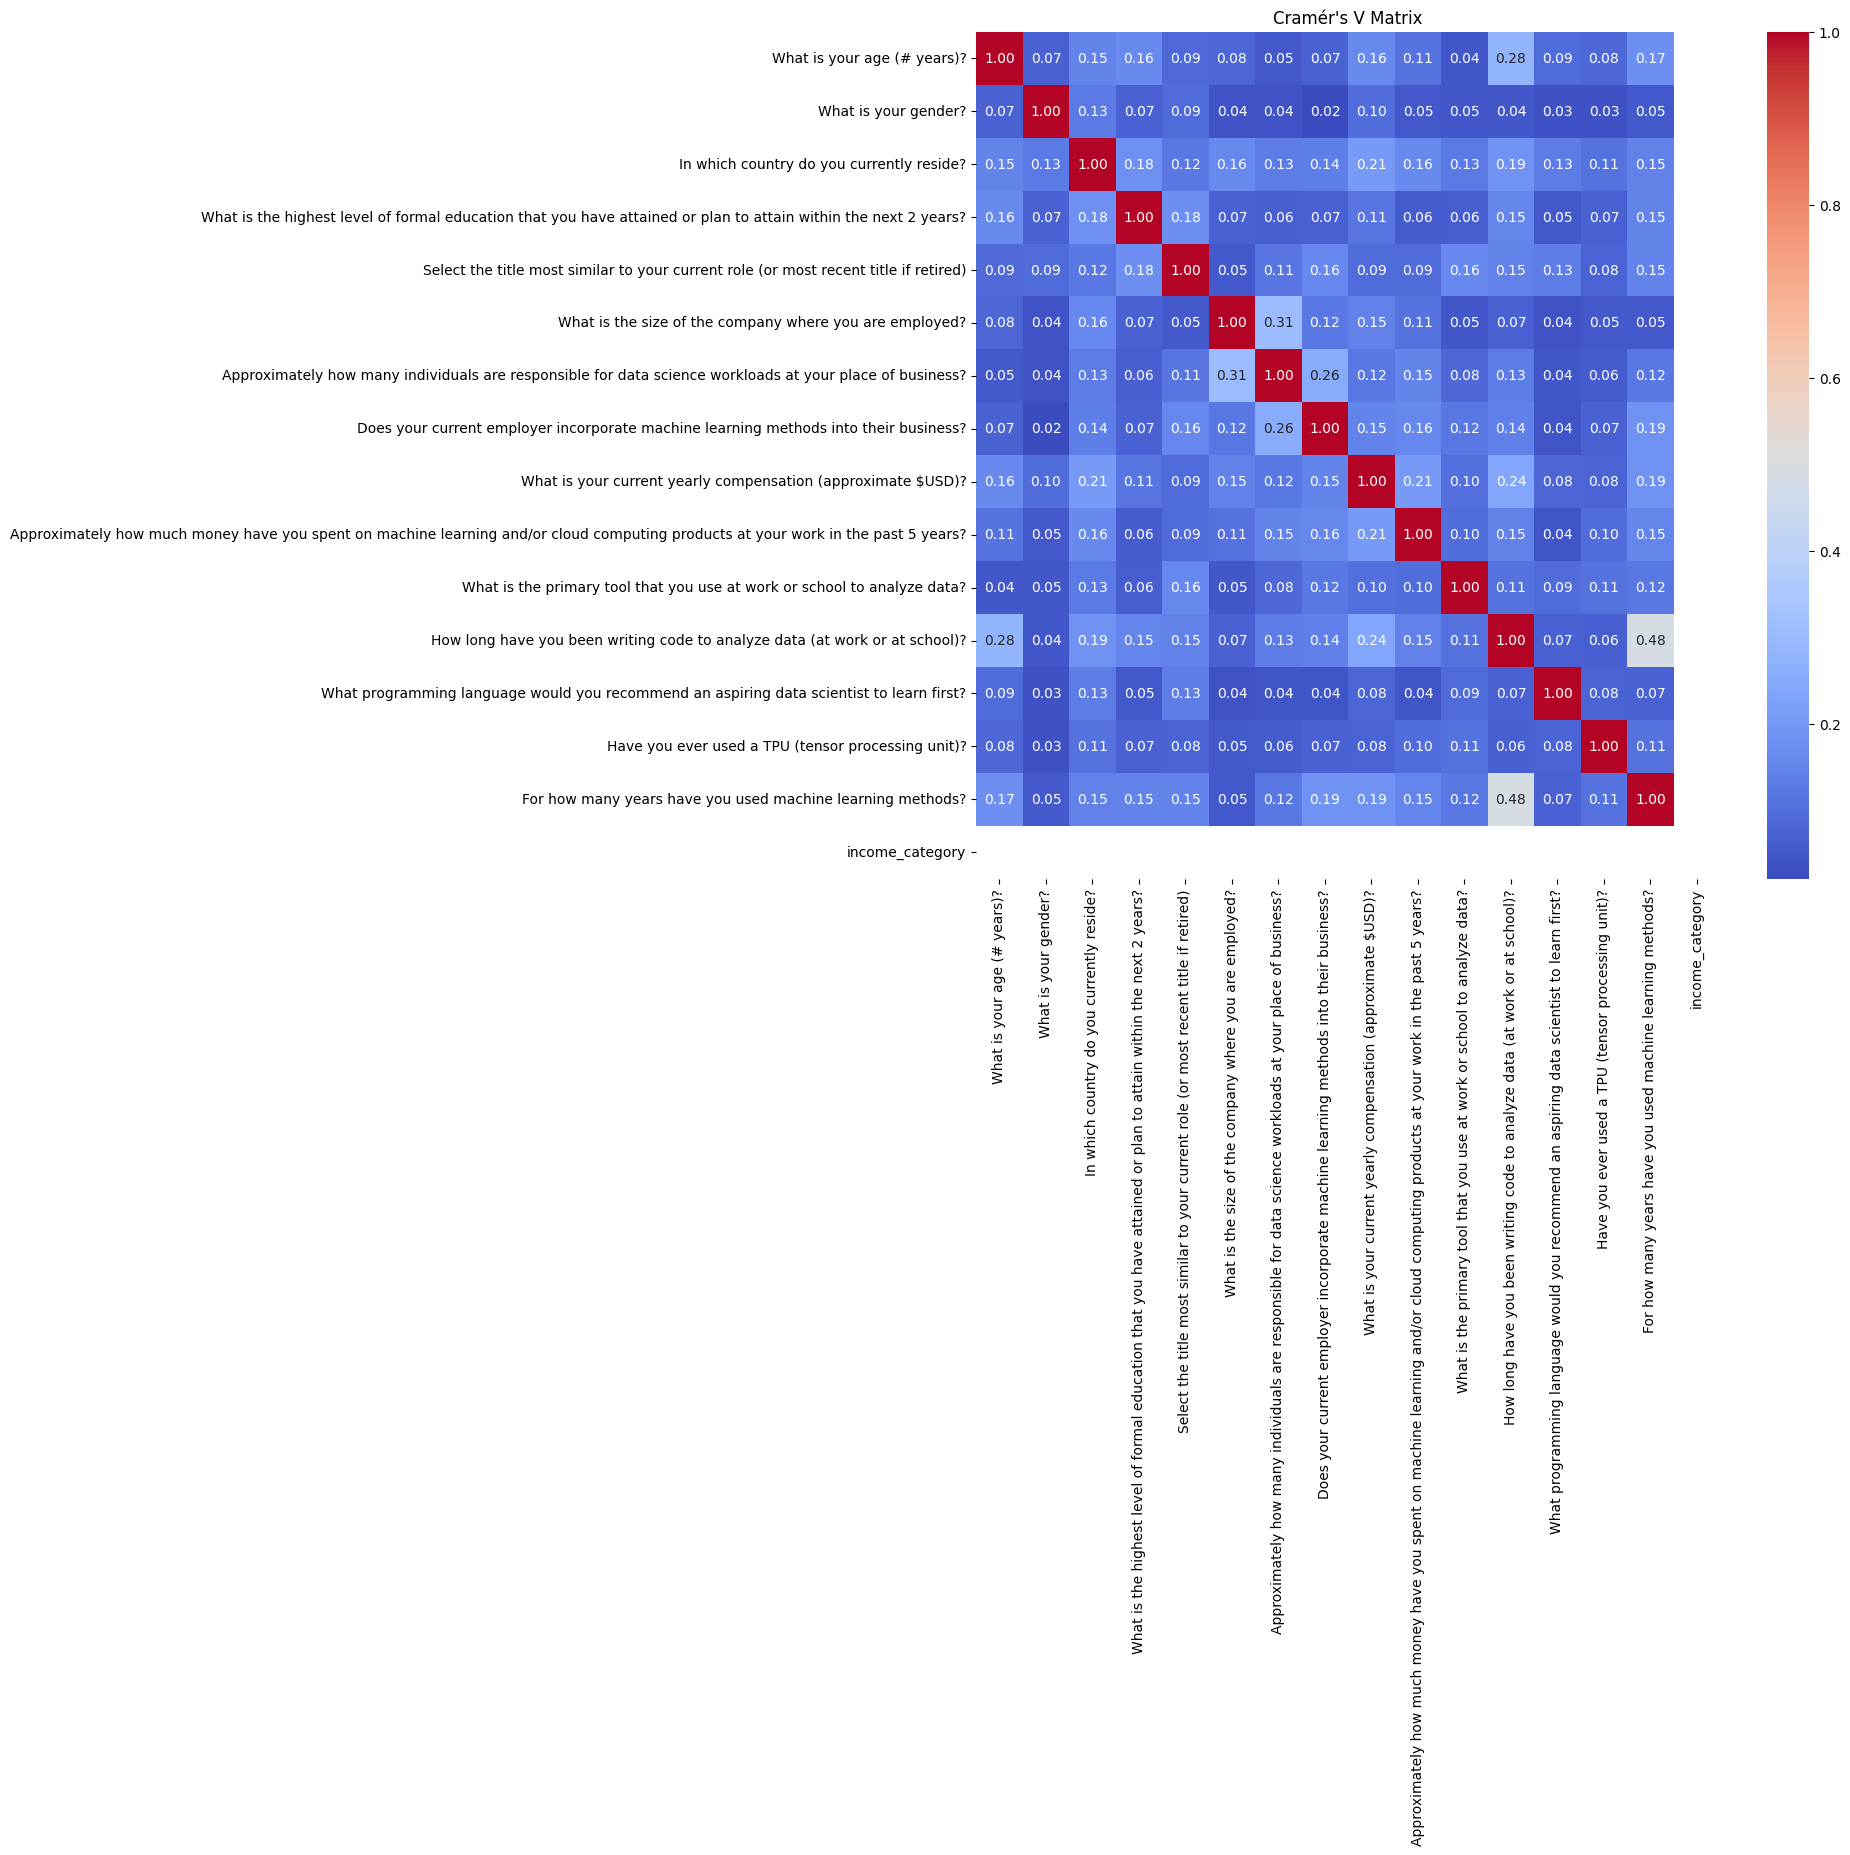

In [18]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    """Compute Cramér's V for two categorical variables."""
    contingency_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(contingency_matrix)
    n = contingency_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(contingency_matrix.shape) - 1)))

# Compute Cramér's V matrix
columns = survey_df.columns
cramers_v_matrix = pd.DataFrame(index=columns, columns=columns)

for col1 in columns:
    for col2 in columns:
        cramers_v_matrix.loc[col1, col2] = cramers_v(survey_df[col1], survey_df[col2])

# Convert to numeric for heatmap
cramers_v_matrix = cramers_v_matrix.astype(float)

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Cramér's V Matrix")
plt.show()


In [19]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7799 entries, 0 to 7798
Data columns (total 16 columns):
 #   Column                                                                                                                             Non-Null Count  Dtype
---  ------                                                                                                                             --------------  -----
 0   What is your age (# years)?                                                                                                        7799 non-null   int64
 1   What is your gender?                                                                                                               7799 non-null   int64
 2   In which country do you currently reside?                                                                                          7799 non-null   int64
 3   What is the highest level of formal education that you have attained or plan to attain within the 

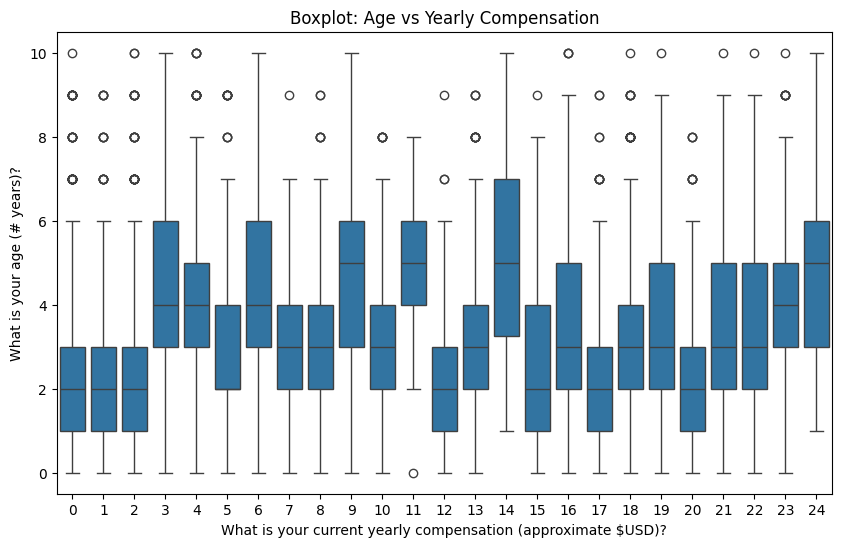

In [16]:
# Boxplot: Relationship between RAM and Target Variable
plt.figure(figsize=(10, 6))
sns.boxplot(x="What is your current yearly compensation (approximate $USD)?", y="What is your age (# years)?", data=survey_df)
plt.title("Boxplot: Age vs Yearly Compensation")
plt.show()

# Histograms for numerical attributes
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(survey_df[feature], kde=True, bins=30)
    plt.title(f"Histogram of {feature}")
    plt.show()

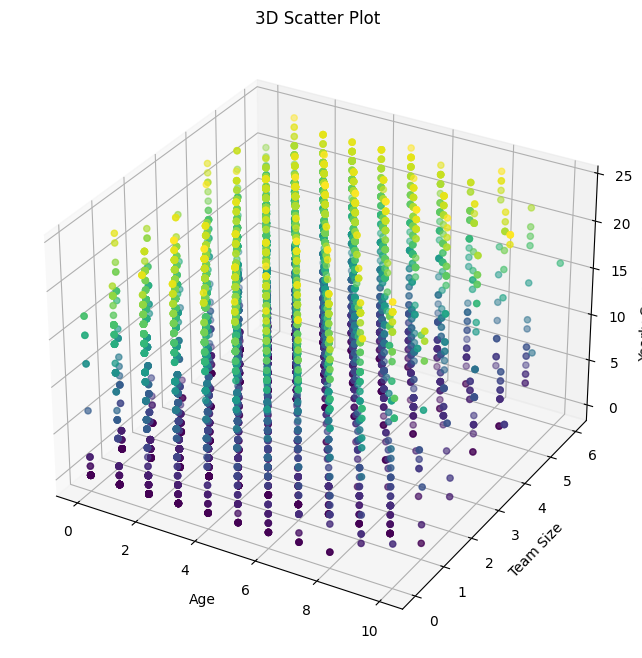

In [18]:
from mpl_toolkits.mplot3d import Axes3D

# Scatter Plot in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(survey_df['What is your age (# years)?'], survey_df['Approximately how many individuals are responsible for data science workloads at your place of business?'], survey_df['encoded_target'], c=survey_df['encoded_target'], cmap='viridis')
ax.set_xlabel("Age")
ax.set_ylabel("Team Size")
ax.set_zlabel("Yearly Compensation")
plt.title("3D Scatter Plot")
plt.show()

In [17]:
def categorize_income(value):
    if value in ['$0-999', '1,000-1,999', '2,000-2,999', '3,000-3,999', '4,000-4,999']:
        return 'B40'
    elif value in ['5,000-7,499', '7,500-9,999', '10,000-14,999', '15,000-19,999', '20,000-24,999',
                   '25,000-29,999', '30,000-39,999']:
        return 'M40'
    else:
        return 'T20'

# Apply the function to the target column
survey_df['income_category'] = survey_df['What is your current yearly compensation (approximate $USD)?'].apply(categorize_income)

In [18]:
survey_df['income_category'] 

0       T20
1       B40
2       M40
3       T20
4       B40
       ... 
7794    B40
7795    M40
7796    M40
7797    T20
7798    T20
Name: income_category, Length: 7799, dtype: object

In [9]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7799 entries, 0 to 7798
Data columns (total 16 columns):
 #   Column                                                                                                                             Non-Null Count  Dtype 
---  ------                                                                                                                             --------------  ----- 
 0   What is your age (# years)?                                                                                                        7799 non-null   object
 1   What is your gender?                                                                                                               7799 non-null   object
 2   In which country do you currently reside?                                                                                          7799 non-null   object
 3   What is the highest level of formal education that you have attained or plan to attain within

                                                    Correlation
income_category                                        1.000000
How long have you been writing code to analyze ...     0.238573
In which country do you currently reside?              0.206747
Approximately how much money have you spent on ...     0.205822
For how many years have you used machine learni...     0.186419
What is your age (# years)?                            0.163732
Does your current employer incorporate machine ...     0.148101
What is the size of the company where you are e...     0.146573
Approximately how many individuals are responsi...     0.120754
What is the highest level of formal education t...     0.112892
What is the primary tool that you use at work o...     0.101280
What is your gender?                                   0.096095
Select the title most similar to your current r...     0.092188
What programming language would you recommend a...     0.077957
Have you ever used a TPU (tensor process

C:\Users\Huawei\AppData\Local\Temp\ipykernel_20772\3112721988.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_df['Correlation'], y=correlation_df.index, palette='coolwarm')


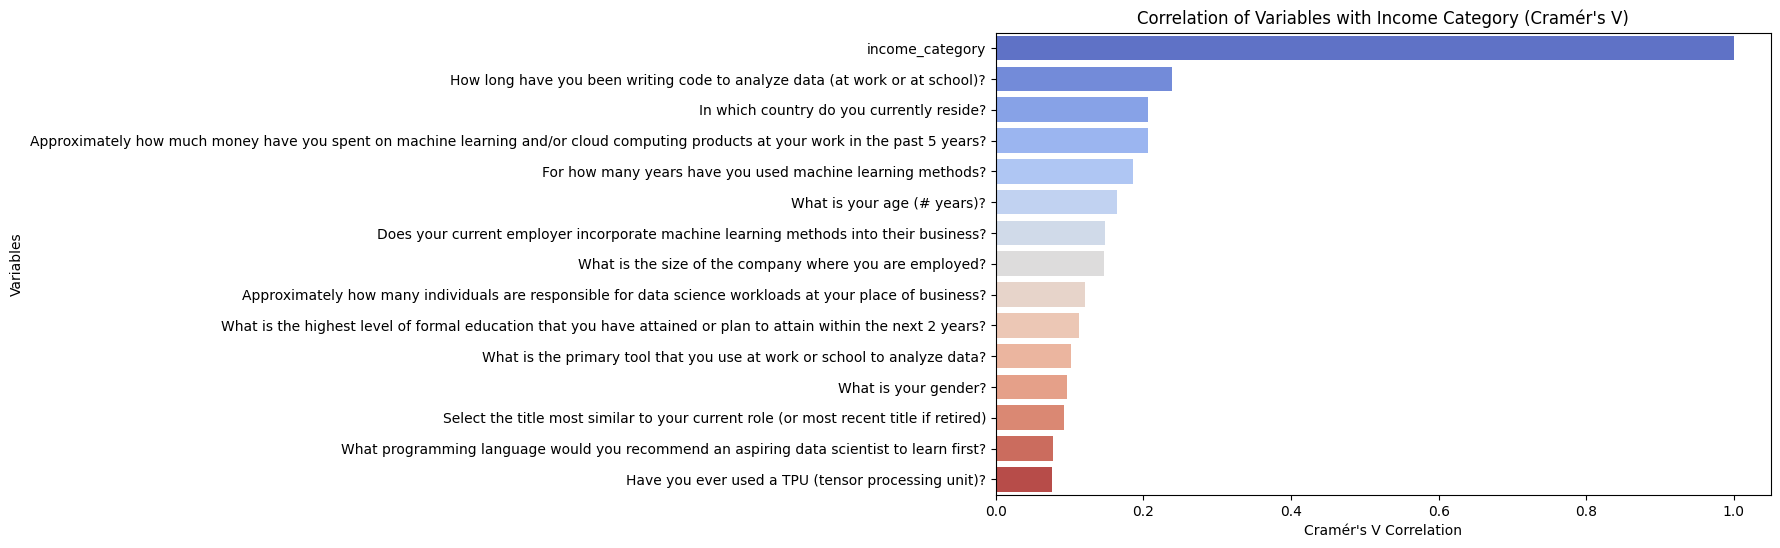

In [15]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

# Target variable
target_variable = 'What is your current yearly compensation (approximate $USD)?'

# List of categorical columns (excluding the target variable itself)
categorical_columns = survey_df.select_dtypes(include=['object', 'category']).columns.drop(target_variable)

# Calculate correlation of the target variable with other categorical variables
correlations = {}

for col in categorical_columns:
    correlations[col] = cramers_v(survey_df[target_variable], survey_df[col])

# Convert correlations dictionary to a DataFrame for visualization
correlation_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation']).sort_values(by='Correlation', ascending=False)

# Display the correlation results
print(correlation_df)

# Plot the correlations as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_df['Correlation'], y=correlation_df.index, palette='coolwarm')
plt.title('Correlation of Variables with Income Category (Cramér\'s V)')
plt.xlabel('Cramér\'s V Correlation')
plt.ylabel('Variables')
plt.show()

                                                    Correlation
What is your current yearly compensation (appro...     1.000000
In which country do you currently reside?              0.501022
How long have you been writing code to analyze ...     0.305952
What is your age (# years)?                            0.282346
For how many years have you used machine learni...     0.272354
Approximately how much money have you spent on ...     0.260291
Does your current employer incorporate machine ...     0.177975
What is the size of the company where you are e...     0.161688
Approximately how many individuals are responsi...     0.148893
What is the highest level of formal education t...     0.132555
Select the title most similar to your current r...     0.129357
What is the primary tool that you use at work o...     0.105869
What is your gender?                                   0.075726
What programming language would you recommend a...     0.060067
Have you ever used a TPU (tensor process

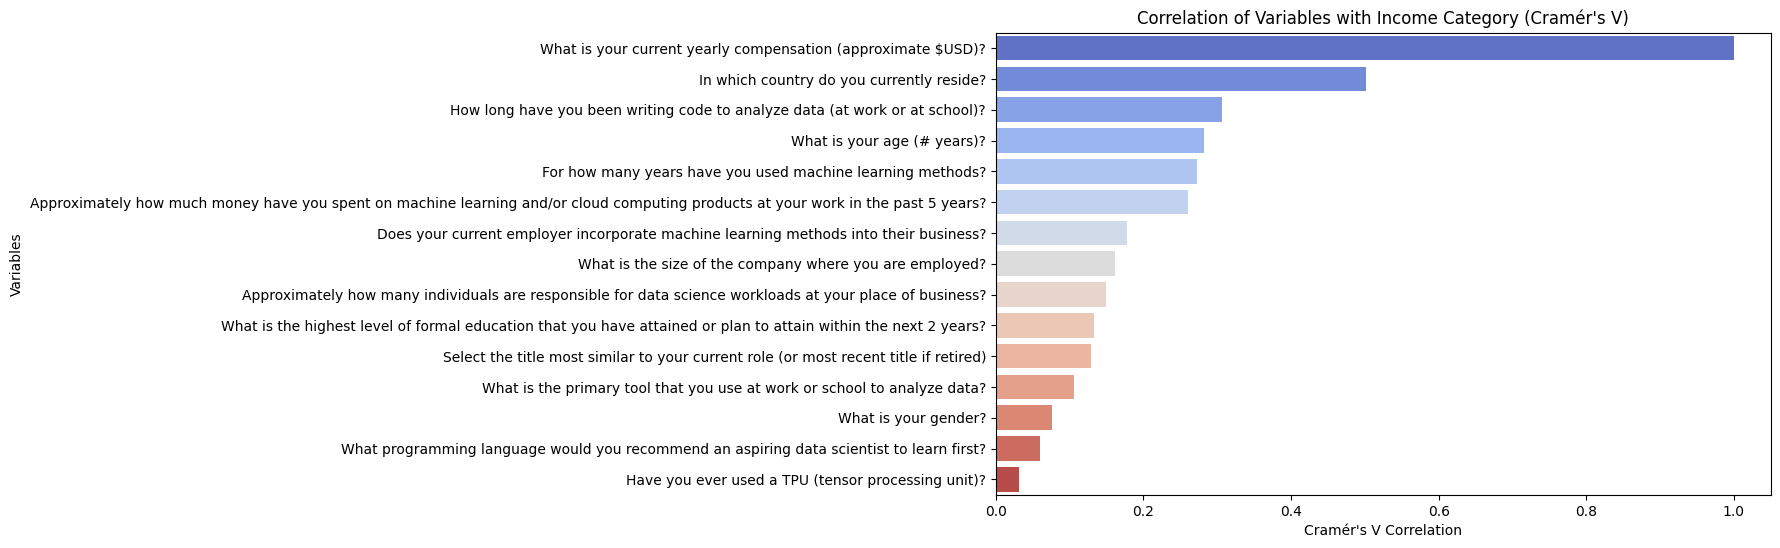

In [25]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

# Target variable
target_variable = 'income_category'

# List of categorical columns (excluding the target variable itself)
categorical_columns = survey_df.select_dtypes(include=['object', 'category']).columns.drop(target_variable)

# Calculate correlation of the target variable with other categorical variables
correlations = {}

for col in categorical_columns:
    correlations[col] = cramers_v(survey_df[target_variable], survey_df[col])

# Convert correlations dictionary to a DataFrame for visualization
correlation_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation']).sort_values(by='Correlation', ascending=False)

# Display the correlation results
print(correlation_df)

# Plot the correlations as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_df['Correlation'], y=correlation_df.index,hue=correlation_df.index, palette='coolwarm', legend=False)
plt.title('Correlation of Variables with Income Category (Cramér\'s V)')
plt.xlabel('Cramér\'s V Correlation')
plt.ylabel('Variables')
plt.show()


<Axes: >

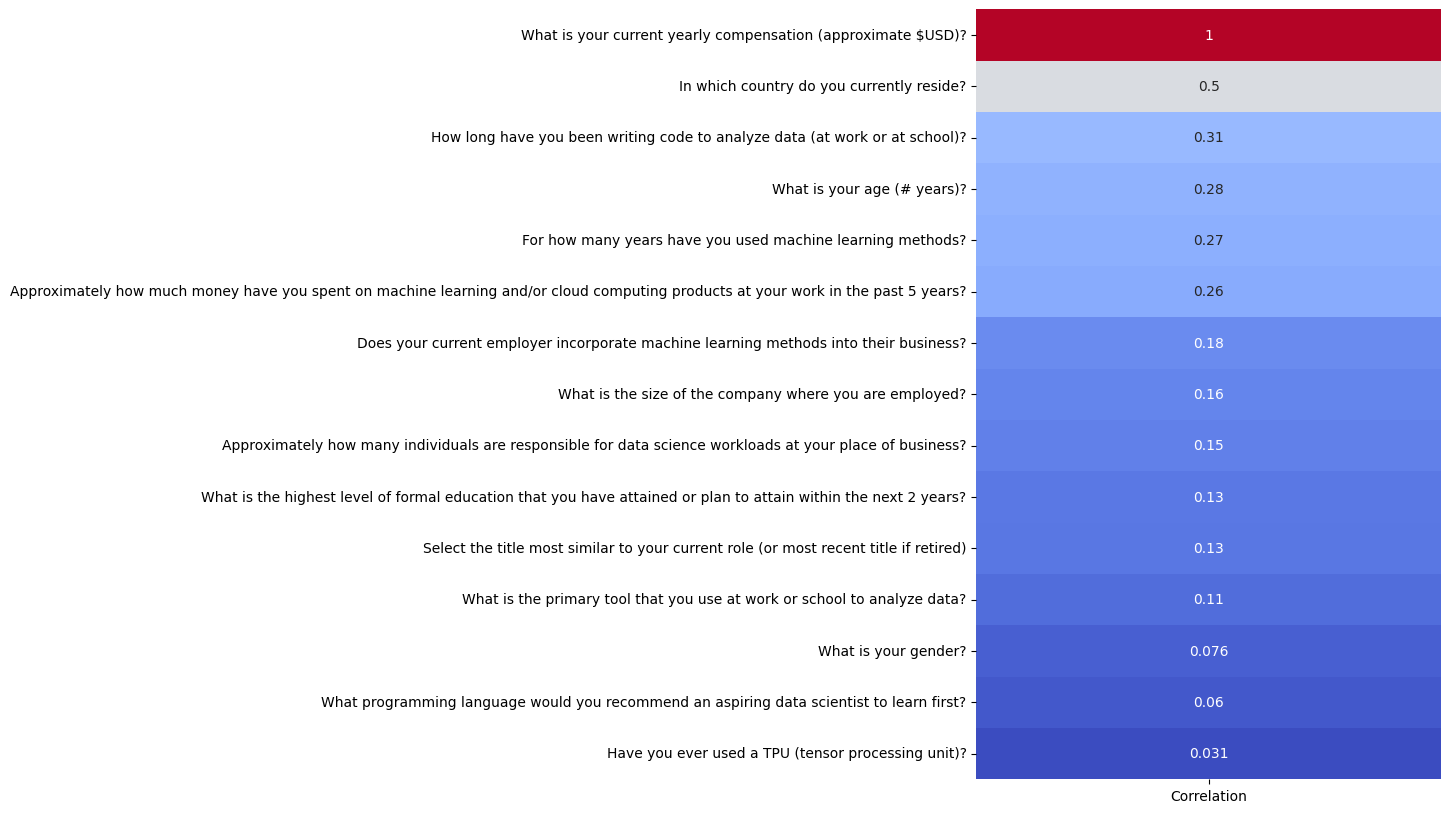

In [26]:
plt.figure(figsize=(6,10))
sns.heatmap(correlation_df, cmap="coolwarm", annot=True, cbar = False)

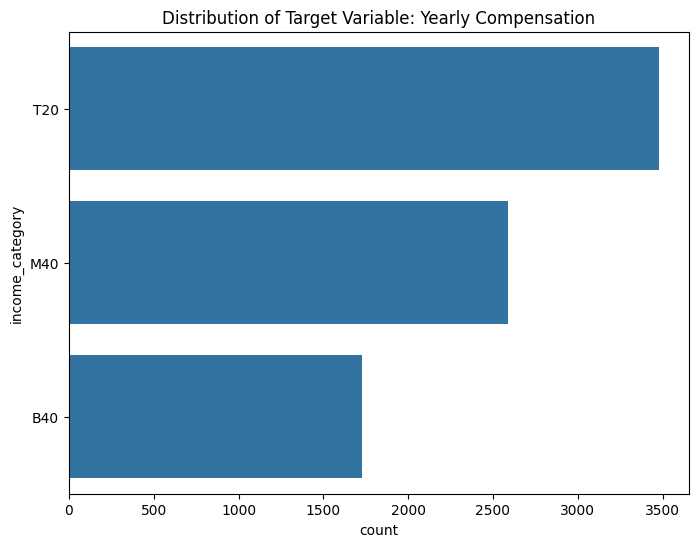

In [20]:
# Target Variable Distribution
plt.figure(figsize=(8, 6))
sns.countplot(y="income_category", data=survey_df, order=survey_df["income_category"].value_counts().index)
plt.title("Distribution of Target Variable: Yearly Compensation")
plt.show()